# Lets build a model to classify MNIST digits using the layers we created

In [1]:
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from dense import Dense
from activations import Tanh
from loss_functions import mse_loss, mse_loss_derivative
from engine import train, predict
from activations import ReLU

In [2]:
def preprocessing(x, y, limit):
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype(np.float32) / 255.0

    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)

    return x[:limit], y[:limit]

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocessing(x_train, y_train, 10000)
x_test, y_test = preprocessing(x_test, y_test, 20)

In [9]:
network = [
    Dense(28 * 28, 40),
    Tanh(),
    Dense(40, 10),
    Tanh()
]

In [10]:
train(network, mse_loss, mse_loss_derivative, x_train, y_train, epochs=100, learning_rate=0.001)

Epoch 1/100, Error: 0.1064
Epoch 2/100, Error: 0.0651
Epoch 3/100, Error: 0.0564
Epoch 4/100, Error: 0.0518
Epoch 5/100, Error: 0.0488
Epoch 6/100, Error: 0.0465
Epoch 7/100, Error: 0.0446
Epoch 8/100, Error: 0.0430
Epoch 9/100, Error: 0.0416
Epoch 10/100, Error: 0.0404
Epoch 11/100, Error: 0.0393
Epoch 12/100, Error: 0.0383
Epoch 13/100, Error: 0.0374
Epoch 14/100, Error: 0.0366
Epoch 15/100, Error: 0.0358
Epoch 16/100, Error: 0.0351
Epoch 17/100, Error: 0.0345
Epoch 18/100, Error: 0.0339
Epoch 19/100, Error: 0.0333
Epoch 20/100, Error: 0.0328
Epoch 21/100, Error: 0.0323
Epoch 22/100, Error: 0.0318
Epoch 23/100, Error: 0.0314
Epoch 24/100, Error: 0.0310
Epoch 25/100, Error: 0.0306
Epoch 26/100, Error: 0.0302
Epoch 27/100, Error: 0.0298
Epoch 28/100, Error: 0.0295
Epoch 29/100, Error: 0.0291
Epoch 30/100, Error: 0.0288
Epoch 31/100, Error: 0.0285
Epoch 32/100, Error: 0.0282
Epoch 33/100, Error: 0.0279
Epoch 34/100, Error: 0.0277
Epoch 35/100, Error: 0.0274
Epoch 36/100, Error: 0.0271
E

In [11]:
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))

pred: 7 	true: 7
pred: 2 	true: 2
pred: 1 	true: 1
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 4 	true: 4
pred: 9 	true: 9
pred: 6 	true: 5
pred: 9 	true: 9
pred: 0 	true: 0
pred: 8 	true: 6
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 1
pred: 5 	true: 5
pred: 9 	true: 9
pred: 7 	true: 7
pred: 8 	true: 3
pred: 4 	true: 4


### lets try to add some layers to the network

In [19]:
network = [
    Dense(28 * 28, 40),
    Tanh(),
    Dense(40, 10),
    Tanh(),
    Dense(10, 10),
    Tanh()
]

In [13]:
train(network, mse_loss, mse_loss_derivative, x_train, y_train, epochs=100, learning_rate=0.001)

Epoch 1/100, Error: 0.1157
Epoch 2/100, Error: 0.0727
Epoch 3/100, Error: 0.0646
Epoch 4/100, Error: 0.0605
Epoch 5/100, Error: 0.0577
Epoch 6/100, Error: 0.0555
Epoch 7/100, Error: 0.0536
Epoch 8/100, Error: 0.0518
Epoch 9/100, Error: 0.0501
Epoch 10/100, Error: 0.0484
Epoch 11/100, Error: 0.0469
Epoch 12/100, Error: 0.0454
Epoch 13/100, Error: 0.0441
Epoch 14/100, Error: 0.0428
Epoch 15/100, Error: 0.0416
Epoch 16/100, Error: 0.0404
Epoch 17/100, Error: 0.0393
Epoch 18/100, Error: 0.0383
Epoch 19/100, Error: 0.0374
Epoch 20/100, Error: 0.0365
Epoch 21/100, Error: 0.0356
Epoch 22/100, Error: 0.0349
Epoch 23/100, Error: 0.0341
Epoch 24/100, Error: 0.0335
Epoch 25/100, Error: 0.0329
Epoch 26/100, Error: 0.0323
Epoch 27/100, Error: 0.0317
Epoch 28/100, Error: 0.0312
Epoch 29/100, Error: 0.0307
Epoch 30/100, Error: 0.0303
Epoch 31/100, Error: 0.0298
Epoch 32/100, Error: 0.0294
Epoch 33/100, Error: 0.0290
Epoch 34/100, Error: 0.0287
Epoch 35/100, Error: 0.0283
Epoch 36/100, Error: 0.0280
E

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")
print(y_pred_list)

Accuracy): 95.00%

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]


### we can see there are predictions only for 20 pics, lets try to test it on more data

In [18]:
# lets try more data for training as well
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocessing(x_train, y_train, 30000)
x_test, y_test = preprocessing(x_test, y_test, 500)

In [20]:
train(network, mse_loss, mse_loss_derivative, x_train, y_train, epochs=100, learning_rate=0.001)

Epoch 1/100, Error: 0.0804
Epoch 2/100, Error: 0.0567
Epoch 3/100, Error: 0.0513
Epoch 4/100, Error: 0.0476
Epoch 5/100, Error: 0.0449
Epoch 6/100, Error: 0.0426
Epoch 7/100, Error: 0.0407
Epoch 8/100, Error: 0.0390
Epoch 9/100, Error: 0.0374
Epoch 10/100, Error: 0.0358
Epoch 11/100, Error: 0.0344
Epoch 12/100, Error: 0.0330
Epoch 13/100, Error: 0.0318
Epoch 14/100, Error: 0.0307
Epoch 15/100, Error: 0.0297
Epoch 16/100, Error: 0.0288
Epoch 17/100, Error: 0.0280
Epoch 18/100, Error: 0.0273
Epoch 19/100, Error: 0.0266
Epoch 20/100, Error: 0.0260
Epoch 21/100, Error: 0.0255
Epoch 22/100, Error: 0.0250
Epoch 23/100, Error: 0.0245
Epoch 24/100, Error: 0.0241
Epoch 25/100, Error: 0.0237
Epoch 26/100, Error: 0.0233
Epoch 27/100, Error: 0.0229
Epoch 28/100, Error: 0.0226
Epoch 29/100, Error: 0.0223
Epoch 30/100, Error: 0.0220
Epoch 31/100, Error: 0.0217
Epoch 32/100, Error: 0.0214
Epoch 33/100, Error: 0.0212
Epoch 34/100, Error: 0.0209
Epoch 35/100, Error: 0.0207
Epoch 36/100, Error: 0.0205
E

In [28]:
y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")

Accuracy): 94.40%



### We achieved 94.4% accuracy on 500 test samples, lets check the classification report and confusion matrix

In [22]:
print("Classification report:")
print(classification_report(y_true_list, y_pred_list))

Classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       0.99      1.00      0.99        67
           2       0.98      0.91      0.94        55
           3       0.93      0.93      0.93        45
           4       0.98      0.96      0.97        55
           5       0.96      0.90      0.93        50
           6       0.91      0.93      0.92        43
           7       0.90      0.94      0.92        49
           8       0.88      0.95      0.92        40
           9       0.94      0.91      0.92        54

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



In [23]:
print(confusion_matrix(y_true_list, y_pred_list))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  2  1  2]
 [ 0  0  0 42  0  1  1  1  0  0]
 [ 0  0  0  0 53  0  2  0  0  0]
 [ 1  0  0  2  0 45  1  0  1  0]
 [ 2  0  0  0  0  1 40  0  0  0]
 [ 0  1  1  0  1  0  0 46  0  0]
 [ 0  0  0  0  0  0  0  1 38  1]
 [ 0  0  0  1  0  0  0  1  3 49]]


### lets decode

In [24]:
errors = []
cm = confusion_matrix(y_true_list, y_pred_list)

for true_label in range(cm.shape[0]):
    for pred_label in range(cm.shape[0]):

        if true_label != pred_label:

            error_count = cm[true_label, pred_label]

            if error_count > 0:
                errors.append({
                    'count': error_count,
                    'true': true_label,
                    'pred': pred_label
                })

sorted_errors = sorted(errors, key=lambda e: e['count'], reverse=True)

if not sorted_errors:
    print("no any mistakes found")
else:
    print("Most fequent errors:\n")
    for error in sorted_errors:
        print(f"  - Real digit '{error['true']}' missmatched with '{error['pred']}'   - {error['count']} times")


Most fequent errors:

  - Real digit '9' missmatched with '8'   - 3 times
  - Real digit '2' missmatched with '7'   - 2 times
  - Real digit '2' missmatched with '9'   - 2 times
  - Real digit '4' missmatched with '6'   - 2 times
  - Real digit '5' missmatched with '3'   - 2 times
  - Real digit '6' missmatched with '0'   - 2 times
  - Real digit '2' missmatched with '8'   - 1 times
  - Real digit '3' missmatched with '5'   - 1 times
  - Real digit '3' missmatched with '6'   - 1 times
  - Real digit '3' missmatched with '7'   - 1 times
  - Real digit '5' missmatched with '0'   - 1 times
  - Real digit '5' missmatched with '6'   - 1 times
  - Real digit '5' missmatched with '8'   - 1 times
  - Real digit '6' missmatched with '5'   - 1 times
  - Real digit '7' missmatched with '1'   - 1 times
  - Real digit '7' missmatched with '2'   - 1 times
  - Real digit '7' missmatched with '4'   - 1 times
  - Real digit '8' missmatched with '7'   - 1 times
  - Real digit '8' missmatched with '9'   

found 3 img, where real digit '9' predicted as '8':



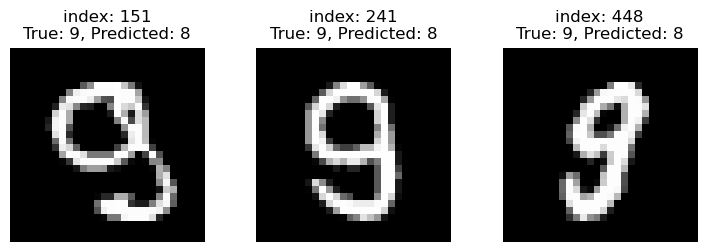

In [27]:
TRUE_LABEL_TO_INSPECT = 9

PRED_LABEL_TO_INSPECT = 8

(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

y_pred_list = []
y_true_list = []
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

specific_error_indexes = np.where(
    (y_true_array == TRUE_LABEL_TO_INSPECT) &
    (y_pred_array == PRED_LABEL_TO_INSPECT)
)[0]

if len(specific_error_indexes) == 0:
    print(f"No errors '{TRUE_LABEL_TO_INSPECT}' with predicted '{PRED_LABEL_TO_INSPECT}'.")
else:
    print(
        f"found {len(specific_error_indexes)} img, where real digit '{TRUE_LABEL_TO_INSPECT}' predicted as '{PRED_LABEL_TO_INSPECT}':\n")

    num_to_show = min(len(specific_error_indexes), 16)
    num_cols = 4
    num_rows = (num_to_show + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 2.5 * num_rows))
    for i, index in enumerate(specific_error_indexes[:num_to_show]):
        plt.subplot(num_rows, num_cols, i + 1)

        plt.imshow(x_test_orig[index], cmap='gray')

        plt.title(f"index: {index}\nTrue: {TRUE_LABEL_TO_INSPECT}, Predicted: {PRED_LABEL_TO_INSPECT}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

### lets feed our model with the rest of data

In [29]:
remaining_x_train = x_train_orig[30000:]
remaining_y_train = y_train_orig[30000:]

x_train_remaining_processed, y_train_remaining_processed = preprocessing(
    remaining_x_train,
    remaining_y_train,
    len(remaining_x_train)
)

train(
    network,
    mse_loss,
    mse_loss_derivative,
    x_train_remaining_processed,
    y_train_remaining_processed,
    epochs=20,
    learning_rate=0.001
)

print("Training on remaining data completed.")

Epoch 1/20, Error: 0.0153
Epoch 2/20, Error: 0.0151
Epoch 3/20, Error: 0.0150
Epoch 4/20, Error: 0.0149
Epoch 5/20, Error: 0.0148
Epoch 6/20, Error: 0.0147
Epoch 7/20, Error: 0.0146
Epoch 8/20, Error: 0.0145
Epoch 9/20, Error: 0.0145
Epoch 10/20, Error: 0.0144
Epoch 11/20, Error: 0.0143
Epoch 12/20, Error: 0.0142
Epoch 13/20, Error: 0.0142
Epoch 14/20, Error: 0.0141
Epoch 15/20, Error: 0.0140
Epoch 16/20, Error: 0.0140
Epoch 17/20, Error: 0.0139
Epoch 18/20, Error: 0.0138
Epoch 19/20, Error: 0.0138
Epoch 20/20, Error: 0.0137
Training on remaining data completed.


### our model shows good results, lets check the accuracy again

In [30]:
x_test_new, y_test_new = x_test_orig[500:], y_test_orig[500:]
y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")

Accuracy): 94.60%



### After we feeded our model with the rest of data, we achieved only 94.6% accuracy, so lets try to change our architecture

In [42]:
network_2 = [
    Dense(28 * 28, 128),
    ReLU(),

    Dense(128, 64),
    ReLU(),

    Dense(64, 10),
]

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocessing(x_train, y_train, 30000)
x_test, y_test = preprocessing(x_test, y_test, 1000)

In [44]:
train(network_2, mse_loss, mse_loss_derivative, x_train, y_train, epochs=100, learning_rate=0.005)

Epoch 1/100, Error: 0.0402
Epoch 2/100, Error: 0.0231
Epoch 3/100, Error: 0.0189
Epoch 4/100, Error: 0.0165
Epoch 5/100, Error: 0.0149
Epoch 6/100, Error: 0.0136
Epoch 7/100, Error: 0.0126
Epoch 8/100, Error: 0.0118
Epoch 9/100, Error: 0.0111
Epoch 10/100, Error: 0.0105
Epoch 11/100, Error: 0.0100
Epoch 12/100, Error: 0.0095
Epoch 13/100, Error: 0.0091
Epoch 14/100, Error: 0.0087
Epoch 15/100, Error: 0.0083
Epoch 16/100, Error: 0.0080
Epoch 17/100, Error: 0.0077
Epoch 18/100, Error: 0.0075
Epoch 19/100, Error: 0.0072
Epoch 20/100, Error: 0.0070
Epoch 21/100, Error: 0.0068
Epoch 22/100, Error: 0.0066
Epoch 23/100, Error: 0.0064
Epoch 24/100, Error: 0.0062
Epoch 25/100, Error: 0.0061
Epoch 26/100, Error: 0.0059
Epoch 27/100, Error: 0.0058
Epoch 28/100, Error: 0.0056
Epoch 29/100, Error: 0.0055
Epoch 30/100, Error: 0.0054
Epoch 31/100, Error: 0.0053
Epoch 32/100, Error: 0.0051
Epoch 33/100, Error: 0.0050
Epoch 34/100, Error: 0.0049
Epoch 35/100, Error: 0.0048


KeyboardInterrupt: 

In [45]:
y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network_2, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")

Accuracy): 96.90%



### now we can see improvement, lets check the classification report and confusion matrix

In [46]:
print("Classification report:")
print(classification_report(y_true_list, y_pred_list))

Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        85
           1       0.99      0.98      0.98       126
           2       0.97      0.98      0.97       116
           3       0.95      0.97      0.96       107
           4       0.98      0.95      0.96       110
           5       0.99      0.94      0.96        87
           6       0.99      0.97      0.98        87
           7       0.98      0.97      0.97        99
           8       0.97      0.96      0.96        89
           9       0.93      0.98      0.95        94

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [47]:
print(confusion_matrix(y_true_list, y_pred_list))

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 123   0   1   0   0   1   0   1   0]
 [  0   0 114   0   0   0   0   1   0   1]
 [  0   0   1 104   0   1   0   1   0   0]
 [  0   0   1   0 104   0   0   0   0   5]
 [  0   0   0   2   1  82   0   0   1   1]
 [  3   0   0   0   0   0  84   0   0   0]
 [  0   1   1   1   0   0   0  96   0   0]
 [  1   0   1   1   1   0   0   0  85   0]
 [  0   0   0   1   0   0   0   0   1  92]]


In [48]:
errors = []
cm = confusion_matrix(y_true_list, y_pred_list)

for true_label in range(cm.shape[0]):
    for pred_label in range(cm.shape[0]):

        if true_label != pred_label:

            error_count = cm[true_label, pred_label]

            if error_count > 0:
                errors.append({
                    'count': error_count,
                    'true': true_label,
                    'pred': pred_label
                })

sorted_errors = sorted(errors, key=lambda e: e['count'], reverse=True)

if not sorted_errors:
    print("no any mistakes found")
else:
    print("Most fequent errors:\n")
    for error in sorted_errors:
        print(f"  - Real digit '{error['true']}' missmatched with '{error['pred']}'   - {error['count']} times")

Most fequent errors:

  - Real digit '4' missmatched with '9'   - 5 times
  - Real digit '6' missmatched with '0'   - 3 times
  - Real digit '5' missmatched with '3'   - 2 times
  - Real digit '1' missmatched with '3'   - 1 times
  - Real digit '1' missmatched with '6'   - 1 times
  - Real digit '1' missmatched with '8'   - 1 times
  - Real digit '2' missmatched with '7'   - 1 times
  - Real digit '2' missmatched with '9'   - 1 times
  - Real digit '3' missmatched with '2'   - 1 times
  - Real digit '3' missmatched with '5'   - 1 times
  - Real digit '3' missmatched with '7'   - 1 times
  - Real digit '4' missmatched with '2'   - 1 times
  - Real digit '5' missmatched with '4'   - 1 times
  - Real digit '5' missmatched with '8'   - 1 times
  - Real digit '5' missmatched with '9'   - 1 times
  - Real digit '7' missmatched with '1'   - 1 times
  - Real digit '7' missmatched with '2'   - 1 times
  - Real digit '7' missmatched with '3'   - 1 times
  - Real digit '8' missmatched with '0'   

found 5 img, where real digit '4' predicted as '9':



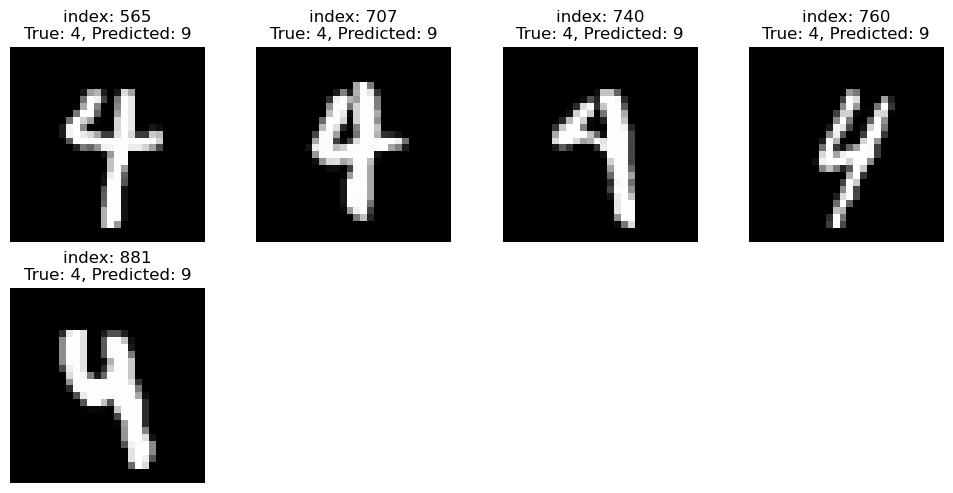

In [50]:
TRUE_LABEL_TO_INSPECT = 4

PRED_LABEL_TO_INSPECT = 9

(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

y_pred_list = []
y_true_list = []
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

specific_error_indexes = np.where(
    (y_true_array == TRUE_LABEL_TO_INSPECT) &
    (y_pred_array == PRED_LABEL_TO_INSPECT)
)[0]

if len(specific_error_indexes) == 0:
    print(f"No errors '{TRUE_LABEL_TO_INSPECT}' with predicted '{PRED_LABEL_TO_INSPECT}'.")
else:
    print(
        f"found {len(specific_error_indexes)} img, where real digit '{TRUE_LABEL_TO_INSPECT}' predicted as '{PRED_LABEL_TO_INSPECT}':\n")

    num_to_show = min(len(specific_error_indexes), 16)
    num_cols = 4
    num_rows = (num_to_show + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 2.5 * num_rows))
    for i, index in enumerate(specific_error_indexes[:num_to_show]):
        plt.subplot(num_rows, num_cols, i + 1)

        plt.imshow(x_test_orig[index], cmap='gray')

        plt.title(f"index: {index}\nTrue: {TRUE_LABEL_TO_INSPECT}, Predicted: {PRED_LABEL_TO_INSPECT}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

### lets try to add some dropout layers

In [4]:
from activations import Dropout

network_3 = [
    Dense(28 * 28, 128),
    ReLU(),
    Dropout(0.5),

    Dense(128, 64),
    ReLU(),
    Dropout(0.5),

    Dense(64, 10)
]

In [5]:
train(network_3, mse_loss, mse_loss_derivative, x_train, y_train, epochs=40, learning_rate=0.005)

Epoch 1/40, Error: 0.0956
Epoch 2/40, Error: 0.0767
Epoch 3/40, Error: 0.0698
Epoch 4/40, Error: 0.0658
Epoch 5/40, Error: 0.0627
Epoch 6/40, Error: 0.0602
Epoch 7/40, Error: 0.0580
Epoch 8/40, Error: 0.0561
Epoch 9/40, Error: 0.0548
Epoch 10/40, Error: 0.0534
Epoch 11/40, Error: 0.0523
Epoch 12/40, Error: 0.0511
Epoch 13/40, Error: 0.0505
Epoch 14/40, Error: 0.0493
Epoch 15/40, Error: 0.0486
Epoch 16/40, Error: 0.0480
Epoch 17/40, Error: 0.0474
Epoch 18/40, Error: 0.0463
Epoch 19/40, Error: 0.0461
Epoch 20/40, Error: 0.0451
Epoch 21/40, Error: 0.0447
Epoch 22/40, Error: 0.0445
Epoch 23/40, Error: 0.0436
Epoch 24/40, Error: 0.0427
Epoch 25/40, Error: 0.0428
Epoch 26/40, Error: 0.0421
Epoch 27/40, Error: 0.0415
Epoch 28/40, Error: 0.0410
Epoch 29/40, Error: 0.0406
Epoch 30/40, Error: 0.0403
Epoch 31/40, Error: 0.0402
Epoch 32/40, Error: 0.0398
Epoch 33/40, Error: 0.0394
Epoch 34/40, Error: 0.0394
Epoch 35/40, Error: 0.0389
Epoch 36/40, Error: 0.0385
Epoch 37/40, Error: 0.0385
Epoch 38/4

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network_3, x, training=False)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")

Accuracy): 91.10%



In [11]:
print("Classification report:")
print(classification_report(y_true_list, y_pred_list))

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        85
           1       0.98      0.98      0.98       126
           2       0.91      0.88      0.89       116
           3       0.95      0.85      0.90       107
           4       0.93      0.92      0.92       110
           5       0.88      0.92      0.90        87
           6       0.87      0.92      0.89        87
           7       0.90      0.91      0.90        99
           8       0.84      0.88      0.86        89
           9       0.89      0.86      0.88        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



### Our model is underfitted, at first we can try increase epochs count

In [12]:
network_4 = [
    Dense(28 * 28, 128),
    ReLU(),
    Dropout(0.5),

    Dense(128, 64),
    ReLU(),
    Dropout(0.5),

    Dense(64, 10)
]

In [13]:
train(network_4, mse_loss, mse_loss_derivative, x_train, y_train, epochs=120, learning_rate=0.005)

Epoch 1/120, Error: 0.0957
Epoch 2/120, Error: 0.0749
Epoch 3/120, Error: 0.0679
Epoch 4/120, Error: 0.0637
Epoch 5/120, Error: 0.0608
Epoch 6/120, Error: 0.0590
Epoch 7/120, Error: 0.0572
Epoch 8/120, Error: 0.0559
Epoch 9/120, Error: 0.0547
Epoch 10/120, Error: 0.0533
Epoch 11/120, Error: 0.0520
Epoch 12/120, Error: 0.0511
Epoch 13/120, Error: 0.0499
Epoch 14/120, Error: 0.0492
Epoch 15/120, Error: 0.0487
Epoch 16/120, Error: 0.0479
Epoch 17/120, Error: 0.0473
Epoch 18/120, Error: 0.0464
Epoch 19/120, Error: 0.0460
Epoch 20/120, Error: 0.0454
Epoch 21/120, Error: 0.0447
Epoch 22/120, Error: 0.0440
Epoch 23/120, Error: 0.0434
Epoch 24/120, Error: 0.0427
Epoch 25/120, Error: 0.0425
Epoch 26/120, Error: 0.0420
Epoch 27/120, Error: 0.0416
Epoch 28/120, Error: 0.0412
Epoch 29/120, Error: 0.0407
Epoch 30/120, Error: 0.0404
Epoch 31/120, Error: 0.0402
Epoch 32/120, Error: 0.0396
Epoch 33/120, Error: 0.0393
Epoch 34/120, Error: 0.0390
Epoch 35/120, Error: 0.0392
Epoch 36/120, Error: 0.0385
E

KeyboardInterrupt: 

In [15]:
y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network_4, x, training=False)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")

Accuracy): 93.00%



### Model improved but it seems that dropout rate is too high, lets try to reduce it

In [16]:
network_5 = [
    Dense(28 * 28, 128),
    ReLU(),
    Dropout(0.2),

    Dense(128, 64),
    ReLU(),
    Dropout(0.2),

    Dense(64, 10)
]

In [17]:
train(network_5, mse_loss, mse_loss_derivative, x_train, y_train, epochs=120, learning_rate=0.005)

Epoch 1/120, Error: 0.0641
Epoch 2/120, Error: 0.0421
Epoch 3/120, Error: 0.0351
Epoch 4/120, Error: 0.0310
Epoch 5/120, Error: 0.0285
Epoch 6/120, Error: 0.0267
Epoch 7/120, Error: 0.0255
Epoch 8/120, Error: 0.0241
Epoch 9/120, Error: 0.0232
Epoch 10/120, Error: 0.0221
Epoch 11/120, Error: 0.0214
Epoch 12/120, Error: 0.0207
Epoch 13/120, Error: 0.0203
Epoch 14/120, Error: 0.0195
Epoch 15/120, Error: 0.0192
Epoch 16/120, Error: 0.0186
Epoch 17/120, Error: 0.0183
Epoch 18/120, Error: 0.0180
Epoch 19/120, Error: 0.0174
Epoch 20/120, Error: 0.0173
Epoch 21/120, Error: 0.0169
Epoch 22/120, Error: 0.0167
Epoch 23/120, Error: 0.0164
Epoch 24/120, Error: 0.0161
Epoch 25/120, Error: 0.0157
Epoch 26/120, Error: 0.0157
Epoch 27/120, Error: 0.0155
Epoch 28/120, Error: 0.0154
Epoch 29/120, Error: 0.0152
Epoch 30/120, Error: 0.0149
Epoch 31/120, Error: 0.0149
Epoch 32/120, Error: 0.0147
Epoch 33/120, Error: 0.0144
Epoch 34/120, Error: 0.0145
Epoch 35/120, Error: 0.0143
Epoch 36/120, Error: 0.0142
E

KeyboardInterrupt: 

In [18]:
y_pred_list = []
y_true_list = []

for x, y in zip(x_test, y_test):
    output = predict(network_5, x, training=False)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

accuracy = accuracy_score(y_true_list, y_pred_list)
print(f"Accuracy): {accuracy * 100:.2f}%\n")

Accuracy): 96.70%



In [19]:
print("Classification report:")
print(classification_report(y_true_list, y_pred_list))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        85
           1       0.99      0.98      0.99       126
           2       0.97      0.97      0.97       116
           3       0.97      0.97      0.97       107
           4       0.98      0.95      0.96       110
           5       0.97      0.97      0.97        87
           6       0.95      0.97      0.96        87
           7       0.97      0.97      0.97        99
           8       0.94      0.93      0.94        89
           9       0.96      0.97      0.96        94

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [20]:
errors = []
cm = confusion_matrix(y_true_list, y_pred_list)

for true_label in range(cm.shape[0]):
    for pred_label in range(cm.shape[0]):

        if true_label != pred_label:

            error_count = cm[true_label, pred_label]

            if error_count > 0:
                errors.append({
                    'count': error_count,
                    'true': true_label,
                    'pred': pred_label
                })

sorted_errors = sorted(errors, key=lambda e: e['count'], reverse=True)

if not sorted_errors:
    print("no any mistakes found")
else:
    print("Most fequent errors:\n")
    for error in sorted_errors:
        print(f"  - Real digit '{error['true']}' missmatched with '{error['pred']}'   - {error['count']} times")

Most fequent errors:

  - Real digit '4' missmatched with '9'   - 4 times
  - Real digit '6' missmatched with '0'   - 3 times
  - Real digit '2' missmatched with '8'   - 2 times
  - Real digit '4' missmatched with '6'   - 2 times
  - Real digit '0' missmatched with '6'   - 1 times
  - Real digit '1' missmatched with '2'   - 1 times
  - Real digit '1' missmatched with '8'   - 1 times
  - Real digit '2' missmatched with '7'   - 1 times
  - Real digit '3' missmatched with '2'   - 1 times
  - Real digit '3' missmatched with '5'   - 1 times
  - Real digit '3' missmatched with '7'   - 1 times
  - Real digit '5' missmatched with '3'   - 1 times
  - Real digit '5' missmatched with '6'   - 1 times
  - Real digit '5' missmatched with '8'   - 1 times
  - Real digit '7' missmatched with '1'   - 1 times
  - Real digit '7' missmatched with '3'   - 1 times
  - Real digit '7' missmatched with '4'   - 1 times
  - Real digit '8' missmatched with '0'   - 1 times
  - Real digit '8' missmatched with '2'   

found 3 img, where real digit '4' predicted as '9':



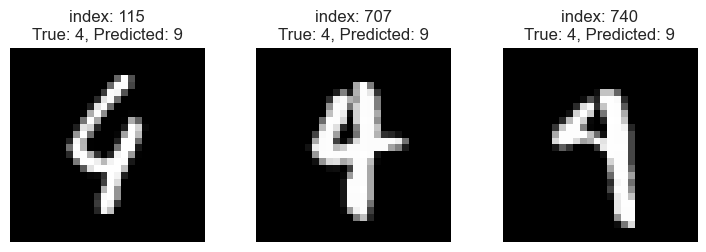

In [22]:
TRUE_LABEL_TO_INSPECT = 4

PRED_LABEL_TO_INSPECT = 9

(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

y_pred_list = []
y_true_list = []
for x, y in zip(x_test, y_test):
    output = predict(network_5, x)
    y_pred_list.append(np.argmax(output))
    y_true_list.append(np.argmax(y))

y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

specific_error_indexes = np.where(
    (y_true_array == TRUE_LABEL_TO_INSPECT) &
    (y_pred_array == PRED_LABEL_TO_INSPECT)
)[0]

if len(specific_error_indexes) == 0:
    print(f"No errors '{TRUE_LABEL_TO_INSPECT}' with predicted '{PRED_LABEL_TO_INSPECT}'.")
else:
    print(
        f"found {len(specific_error_indexes)} img, where real digit '{TRUE_LABEL_TO_INSPECT}' predicted as '{PRED_LABEL_TO_INSPECT}':\n")

    num_to_show = min(len(specific_error_indexes), 16)
    num_cols = 4
    num_rows = (num_to_show + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 2.5 * num_rows))
    for i, index in enumerate(specific_error_indexes[:num_to_show]):
        plt.subplot(num_rows, num_cols, i + 1)

        plt.imshow(x_test_orig[index], cmap='gray')

        plt.title(f"index: {index}\nTrue: {TRUE_LABEL_TO_INSPECT}, Predicted: {PRED_LABEL_TO_INSPECT}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Conclusion for this architecture:
### If we compare just metrics, yes, the model without dropout layers shows better results, but there is a risk of overfitting. But if we look at the confusion matrix, we can see that the model with dropout layers has fewer mistakes, which means it is more generalized and less prone to overfitting. So, I would say that the model with dropout layers is better for this task.

### mse loss and ReLU activation function is working, but its not hte best optimized approach for this task. In other notebook I will try to implement cross entropy loss and softmax activation function, which is more suitable for classification tasks.